In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_df.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CryoSleep     12970 non-null  object 
 1   Destination   12970 non-null  object 
 2   Age           12970 non-null  float64
 3   VIP           12970 non-null  object 
 4   RoomService   12970 non-null  float64
 5   FoodCourt     12970 non-null  float64
 6   ShoppingMall  12970 non-null  float64
 7   Spa           12970 non-null  float64
 8   VRDeck        12970 non-null  float64
 9   Transported   8693 non-null   float64
 10  Deck          12970 non-null  object 
 11  Side          12970 non-null  object 
 12  HomePlanet    12970 non-null  object 
dtypes: float64(7), object(6)
memory usage: 1.3+ MB


In [4]:
df = pd.get_dummies(df, drop_first=True)

In [5]:
# Data to be predicted
desired_col = df[df['Transported'].isnull()]
desired_col = desired_col.drop(['Transported'], axis = 1)

In [6]:
desired_col.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep_None,CryoSleep_True,Destination_None,Destination_PSO J318.5-22,...,Deck_E,Deck_F,Deck_G,Deck_None,Deck_T,Side_P,Side_S,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_None
8693,27.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
8694,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
8695,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
8696,38.0,0.0,6652.0,0.0,181.0,585.0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8697,20.0,10.0,0.0,635.0,0.0,0.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [7]:
#Training data
tr_data = df.copy()
tr_data = tr_data.dropna()

In [8]:
tr_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleep_None,CryoSleep_True,Destination_None,...,Deck_E,Deck_F,Deck_G,Deck_None,Deck_T,Side_P,Side_S,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_None
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [9]:
X = tr_data.drop('Transported', axis = 1)
y = tr_data['Transported']

In [10]:
y = y.astype('int64')

## Support vector classifier

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [18]:
svc = SVC()

In [19]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [20]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [22]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [23]:
y_pred = grid.predict(scaled_X_test)

C:\Users\79852\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


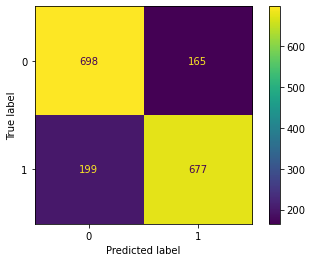

In [26]:
plot_confusion_matrix(grid,scaled_X_test,y_test);

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       863
           1       0.80      0.77      0.79       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [28]:
grid.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(),
 'n_jobs': None,
 'param_grid': {'C': [0.001, 0.01, 0.1, 0.5, 1], 'gamma': ['scale', 'auto']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [29]:
final_model = SVC(C=1, gamma='auto')

In [30]:
scaled_X = scaler.fit_transform(X)
sc_desired_col = scaler.fit_transform(desired_col)

In [31]:
final_model.fit(scaled_X, y)

SVC(C=1, gamma='auto')

In [32]:
final_pred = final_model.predict(scaled_X)

In [34]:
print(classification_report(y,final_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      4315
           1       0.81      0.81      0.81      4378

    accuracy                           0.81      8693
   macro avg       0.81      0.81      0.81      8693
weighted avg       0.81      0.81      0.81      8693



In [35]:
result = final_model.predict(sc_desired_col)

In [36]:
test = pd.read_csv('test.csv')

In [37]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Transported':result})
submission['Transported'] = submission['Transported'].astype(int)
print(submission.shape)

(4277, 2)


In [38]:
submission['Transported'].value_counts()

1    2164
0    2113
Name: Transported, dtype: int64

In [39]:
submission['Transported'] = submission['Transported'].astype('bool')

In [40]:
filename = 'space_preds.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: space_preds.csv
